# Pymaceuticals Inc.
---

### Analysis

- Based on the pie charts we can see that the number of Female to Male mice tested is reletively equal, thus arguing that gender did not play a significant role in the sway of the resuts.
- Capomulin and Ramicane had significantly better results than the other drug regimens.
- The heavier a mouse weighed the bigger the tumor volume based on the scatter plots
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [35]:
# Checking the number of mice
num_mice = data_complete["Mouse ID"].value_counts()
len(num_mice)

249

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_complete.loc[data_complete.duplicated(subset = ["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
chart_data = data_complete.loc[data_complete["Mouse ID"] == 'g989']
chart_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_complete = data_complete[data_complete["Mouse ID"].isin(duplicate_mice) == False]
clean_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_complete["Mouse ID"].value_counts()
len(num_mice_clean)

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumorvolume = clean_complete.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumorvolume["Tumor Volume (mm3)"].mean()
tumor_median = tumorvolume["Tumor Volume (mm3)"].median()
tumor_variance = tumorvolume["Tumor Volume (mm3)"].var()
tumor_standard_deviation = tumorvolume["Tumor Volume (mm3)"].std()
tumor_sem = tumorvolume["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
tumorvolume_df = pd.DataFrame ({"Mean Tumor Volume":tumor_mean,
                                "Median Tumor Volume":tumor_median,
                                " Tumor Volume Variance":tumor_variance,
                                "Tumor Volume Std. Dev.":tumor_standard_deviation,
                                "Tumor Volume Std. Err.":tumor_sem
})
tumorvolume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumorvolume_agg = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median", "var", "std", "sem"])
tumorvolume_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

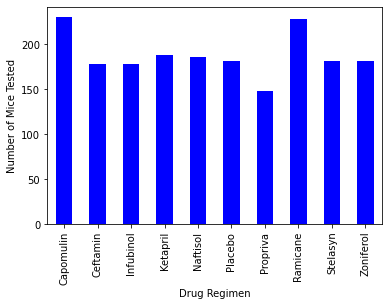

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
all_mice_tested = clean_complete.groupby(["Drug Regimen"])["Timepoint"].count()

#plot bar
all_mice_tested.plot(kind="bar",figsize=(6,4), color = "b")
plt.ylabel("Number of Mice Tested")

plt.show()

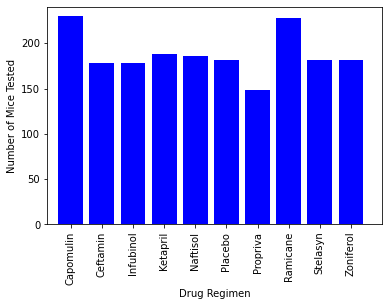

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(all_mice_tested))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, all_mice_tested, color="b", align="center")
plt.xticks(tick_locations, all_mice_tested.index.values, rotation= "vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(all_mice_tested)+10)

#Set Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

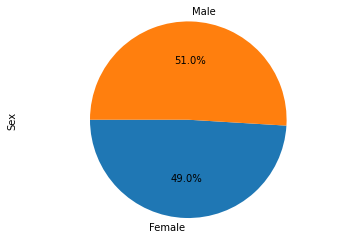

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_complete.groupby(['Sex'])['Sex'].count()
                                        
male_vs_female.plot(kind="pie", startangle=180, autopct="%1.1f%%", subplots =True )

plt.axis("equal")
plt.show()

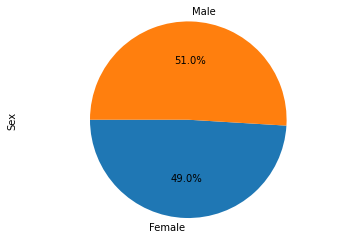

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie = ["Female","Male"]

plt.pie(male_vs_female,
        autopct="%1.1f%%", startangle=180, labels=pie)
plt.ylabel("Sex")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#final_volume = clean_complete[clean_complete['Drug Regimen'].isin(["Capomulin", "Ramicane","Infubinol","Ceftamin"])]


#  Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_complete.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df = greatest_tp.merge(clean_complete, on=("Mouse ID", "Timepoint"))
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentlist = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatmentlist:
    tumorvolume_rows = combined_df.loc[combined_df['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumorvolume_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
# Determine outliers using upper and lower bounds                     
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
#Outliers
    outliers = tumorvolume_rows.loc[(tumorvolume_rows <= lower_bound)|(tumorvolume_rows >= upper_bound)]
    
#add subset
    tumorvol_list.append(tumorvolume_rows)  
    
#Print       
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


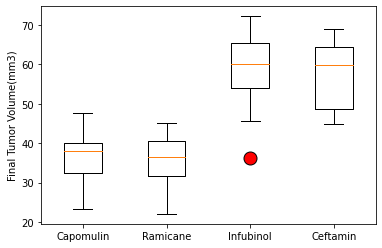

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


axl = dict(markerfacecolor = "red", markersize = 13)
plt.boxplot(tumorvol_list, flierprops = axl, labels = treatmentlist)

plt.ylabel("Final Tumor Volume(mm3)")

plt.show()

## Line and Scatter Plots

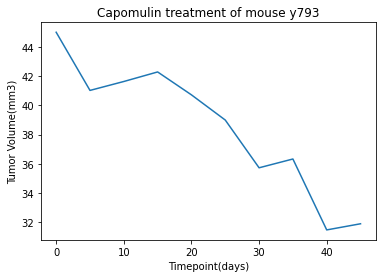

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorvol_cap = clean_complete.loc[clean_complete["Drug Regimen"]== "Capomulin"]
mouse_data = tumorvol_cap.loc[tumorvol_cap["Mouse ID"]== "y793"]
plt.title("Capomulin treatment of mouse y793")
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel('Timepoint(days)')
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])
plt.show()


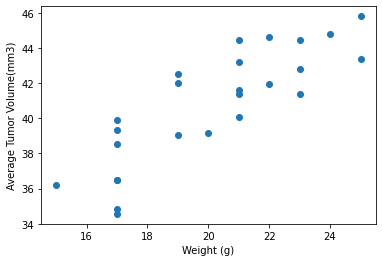

In [50]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_weight = clean_complete.loc[clean_complete['Drug Regimen'] == "Capomulin"].groupby(["Mouse ID"]).mean()

x_values = average_weight['Weight (g)']
y_values = average_weight['Tumor Volume (mm3)']

plt.scatter(x_values,y_values)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()

## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_co = round(pearsonr(average_weight['Weight (g)'],average_weight['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr_co}")

The correlation between mouse weight and the average tumor volume is 0.84


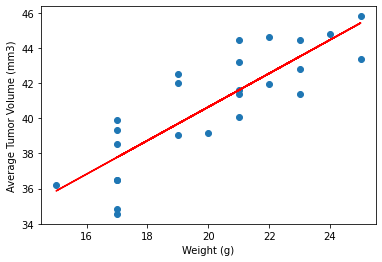

In [52]:
x_values = average_weight['Weight (g)']
y_values = average_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()